# Breast Cancer classification
This data supports for learning classification algorithm

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
print("Shape of cancer data: {}".format(cancer['data'].shape))

Shape of cancer data: (569, 30)


In [3]:
print("Names of cancer features: {}".format(cancer['feature_names']))

Names of cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print("Names of cancer target: {}".format(cancer['target_names']))

Names of cancer target: ['malignant' 'benign']


In [5]:
import numpy as np
print("sample counts: \n {}".format(
    {n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}
))

sample counts: 
 {'malignant': 212, 'benign': 357}


In [6]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test,y_train, y_test = train_test_split(
    cancer['data'], cancer['target'],
    stratify=cancer['target'],
    random_state=60
    )
training_accuracy = []
test_accuracy = []

neighbors_setting = range(1,11)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
for n_neighbor in neighbors_setting:
    # build model
    clf = KNeighborsClassifier(n_neighbors=n_neighbor)
    clf.fit(X_train, y_train)

    # record training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))


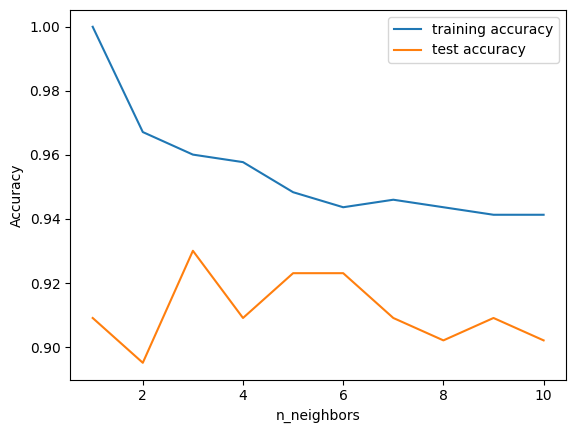

In [13]:
# plot the accuracy
import matplotlib.pyplot as plt
plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The plot shows there are characteristics of overfitting and underfitting(note that because considering fewer neighbors corresponds to a more complex model). As more neighbors are taken into consideration, we simplyfied our models, the test on training sets are lower accurate.

When we get to somewhat around 4 neighbors, the accuracy of both training and tests sets falls off, this can be consider over simplified an underfitting our model.